# Long bar with small wicks Trailing SL

## Import Library

In [1]:
import sys
sys.path.append('../../')

In [2]:

from config.constants import *
from backtesting import Backtest
from util.plot_equity import plot_equity_trades
from util.load_data import load_data
from Long_Bar_Small_Wicks_TrailingSL import Long_Bar_Small_Wicks_TrailingSL
from util.Save_result_return import save_to_csv


## Get Data

In [3]:
XAUUSD = load_data()

In [4]:
XAUUSD['D1'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5043 entries, 2007-01-01 to 2023-03-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5043 non-null   float64
 1   High    5043 non-null   float64
 2   Low     5043 non-null   float64
 3   Close   5043 non-null   float64
 4   Volume  5043 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 236.4 KB


## Define Strategy

In [5]:
strategy = Long_Bar_Small_Wicks_TrailingSL

In [6]:
account_size = 10000

# Backtest each time frame

## TF D1

In [7]:
Backtest_D1 = Backtest(XAUUSD['D1'], strategy, cash=account_size, margin=1/100,  commission=0.0002 )
result_D1 = Backtest_D1.run()
result_D1

Start                     2007-01-01 00:00:00
End                       2023-03-10 00:00:00
Duration                   5912 days 00:00:00
Exposure Time [%]                    1.229427
Equity Final [$]                 10188.012064
Equity Peak [$]                  10218.073038
Return [%]                           1.880121
Buy & Hold Return [%]               193.12344
Return (Ann.) [%]                    0.093121
Volatility (Ann.) [%]                0.317167
Sharpe Ratio                         0.293603
Sortino Ratio                        0.753949
Calmar Ratio                         0.180079
Max. Drawdown [%]                   -0.517114
Avg. Drawdown [%]                   -0.332714
Max. Drawdown Duration     3615 days 00:00:00
Avg. Drawdown Duration      737 days 00:00:00
# Trades                                    4
Win Rate [%]                             50.0
Best Trade [%]                       6.824651
Worst Trade [%]                     -1.154327
Avg. Trade [%]                    

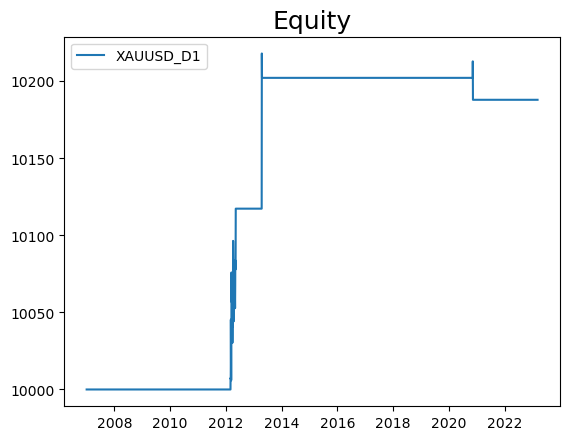

In [8]:
plot_equity_trades(result_D1['_equity_curve'],'XAUUSD_D1' , account_size)

### Save output

In [9]:
save_to_csv(result_D1, '../../out/Technical_Strategy/Long_Bar_Small_Wicks_TrailingSL/Backtest/result_D1.csv')  

## TF H4

In [10]:
Backtest_H4 = Backtest(XAUUSD['H4'], strategy,
                       cash=account_size, margin=1/100,  commission=0.0002 )
result_H4 = Backtest_H4.run()
result_H4

Start                     2007-01-01 00:00:00
End                       2023-03-10 16:00:00
Duration                   5912 days 16:00:00
Exposure Time [%]                    0.958577
Equity Final [$]                  9905.058056
Equity Peak [$]                  10006.155588
Return [%]                          -0.949419
Buy & Hold Return [%]              193.329158
Return (Ann.) [%]                   -0.047658
Volatility (Ann.) [%]                0.157532
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -1.010353
Avg. Drawdown [%]                   -0.525009
Max. Drawdown Duration     3405 days 00:00:00
Avg. Drawdown Duration     1476 days 23:00:00
# Trades                                   49
Win Rate [%]                         6.122449
Best Trade [%]                       2.550596
Worst Trade [%]                     -0.801992
Avg. Trade [%]                    

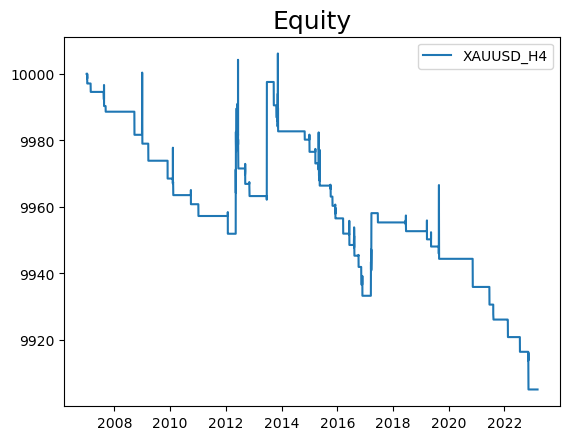

In [11]:
plot_equity_trades(result_H4['_equity_curve'], 'XAUUSD_H4' , account_size)

### Save output

In [12]:
save_to_csv(result_H4, '../../out/Technical_Strategy/Long_Bar_Small_Wicks_TrailingSL/Backtest/result_H4.csv')  

## TF H1

In [13]:
Backtest_H1 = Backtest(XAUUSD['H1'], strategy,
                       cash=account_size, margin=1/100,  commission=0.0002 )
result_H1 = Backtest_H1.run()
result_H1

Start                     2007-01-01 00:00:00
End                       2023-03-10 17:00:00
Duration                   5912 days 17:00:00
Exposure Time [%]                    2.524654
Equity Final [$]                 10285.281188
Equity Peak [$]                  10312.615991
Return [%]                           2.852812
Buy & Hold Return [%]               193.27055
Return (Ann.) [%]                    0.140659
Volatility (Ann.) [%]                0.299006
Sharpe Ratio                         0.470421
Sortino Ratio                         1.16542
Calmar Ratio                         0.208649
Max. Drawdown [%]                   -0.674143
Avg. Drawdown [%]                   -0.099789
Max. Drawdown Duration     2073 days 18:00:00
Avg. Drawdown Duration       76 days 07:00:00
# Trades                                  297
Win Rate [%]                        12.457912
Best Trade [%]                        3.58578
Worst Trade [%]                     -0.365658
Avg. Trade [%]                    

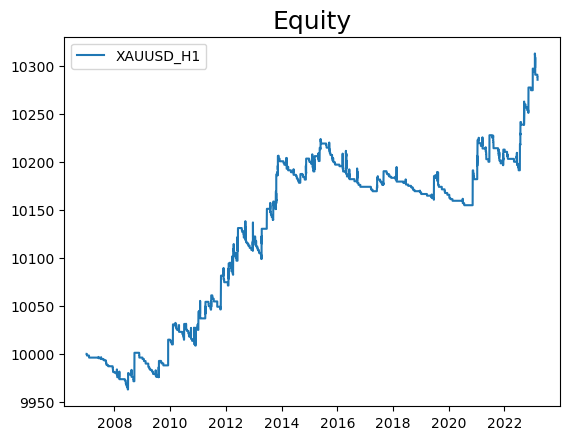

In [14]:
plot_equity_trades(result_H1['_equity_curve'], 'XAUUSD_H1', account_size)

### Save output

In [15]:
save_to_csv(result_H1, '../../out/Technical_Strategy/Long_Bar_Small_Wicks_TrailingSL/Backtest/result_H1.csv')  

## TF M30 

In [16]:
Backtest_M30 = Backtest(XAUUSD['M30'], strategy,
                       cash=account_size, margin=1/100,  commission=0.0002 )
result_M30 = Backtest_M30.run()
result_M30

Start                     2007-01-01 00:00:00
End                       2023-03-10 17:30:00
Duration                   5912 days 17:30:00
Exposure Time [%]                    1.571423
Equity Final [$]                  10056.39078
Equity Peak [$]                    10099.2075
Return [%]                           0.563908
Buy & Hold Return [%]              193.338852
Return (Ann.) [%]                    0.028103
Volatility (Ann.) [%]                 0.24379
Sharpe Ratio                         0.115277
Sortino Ratio                        0.255875
Calmar Ratio                         0.045467
Max. Drawdown [%]                   -0.618107
Avg. Drawdown [%]                   -0.099361
Max. Drawdown Duration     3794 days 05:30:00
Avg. Drawdown Duration      214 days 13:02:00
# Trades                                  390
Win Rate [%]                        11.538462
Best Trade [%]                       3.220474
Worst Trade [%]                     -0.400982
Avg. Trade [%]                    

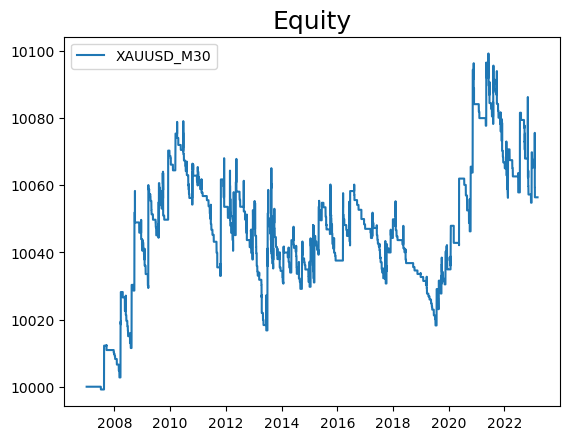

In [17]:
plot_equity_trades(result_M30['_equity_curve'], 'XAUUSD_M30', account_size)

### Save output

In [18]:
save_to_csv(result_M30, '../../out/Technical_Strategy/Long_Bar_Small_Wicks_TrailingSL/Backtest/result_M30.csv')  